In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [146]:
base_path = '/Users/kelly.li/stocks/china/tushare/'
def get_daily(ts_code):
    return pd.read_csv(base_path + 'daily/%s.csv' % str(ts_code[0:6]))
def get_basic_stock():
    return pd.read_csv(base_path + 'stock_basic.csv')
def get_roe():
    return pd.read_csv(base_path + 'roe-2020-01-12.csv')

In [147]:
roe= get_roe()
basic_stock = get_basic_stock()

In [148]:
roe.columns = ['ts_code','name','price','pct','roe_2019_3','roe_2019_2','roe_2019_1','roe_2018','roe_2017','roe_2016','roe_2015','roe_2021','roe_2020','roe_2019_4','np_2019_9','na_2019_9','ths_industry','pe_2010_1']
roe_clean = roe[['ts_code','name','ths_industry','roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_1','roe_2019_2','roe_2019_3','roe_2019_4','roe_2020','roe_2021']]
roe_clean = roe_clean.replace('--',np.nan)
roe_clean.iloc[:,3:] = roe_clean.iloc[:,3:].astype(float)
roe_clean[['roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_1','roe_2019_2','roe_2019_3','roe_2019_4','roe_2020','roe_2021']] = roe_clean[['roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_1','roe_2019_2','roe_2019_3','roe_2019_4','roe_2020','roe_2021']].astype(float)
roe_clean = pd.merge(roe_clean,basic_stock[['ts_code','industry']],on='ts_code')

In [150]:
roe_clean.to_csv(base_path + 'roe.csv',index=False)

In [31]:
roe_clean['roe_2019_3_pct'] = (roe_clean['roe_2019_3']-roe_clean['roe_2019_2'])/roe_clean['roe_2019_2']
roe_clean['roe_2019_4_pct'] = (roe_clean['roe_2019_4']-roe_clean['roe_2019_3'])/roe_clean['roe_2019_3']
roe_clean['roe_2019_pct'] = (roe_clean['roe_2019_4']-roe_clean['roe_2018'])/roe_clean['roe_2018']


In [119]:
a = roe_clean.sort_values(by='roe_2019_pct',ascending=False)
#a = a.loc[:,['name','roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_4']]
a = a.loc[:,['name','ts_code','roe_2019_1','roe_2019_2','roe_2019_3','roe_2019_4']]
a

,name,ts_code,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4
110,上海新阳,300236.SZ,0.50,20.08,20.97,21.10
257,万集科技,300552.SZ,-2.14,-1.50,15.67,32.69
3383,江苏索普,600746.SH,0.15,-0.24,-1.51,25.41
1715,中海油服,601808.SH,0.10,2.79,6.00,7.00
2065,光大证券,601788.SH,2.75,3.35,4.70,5.32
590,腾达建设,600512.SH,7.41,9.68,11.60,11.27
21,金溢科技,002869.SZ,0.93,4.37,32.33,43.28
1561,康力电梯,002367.SZ,0.93,3.29,6.56,7.90
1720,泰胜风能,300129.SZ,0.93,2.39,5.98,7.80
1918,兴业证券,601377.SH,3.01,3.99,5.22,6.19


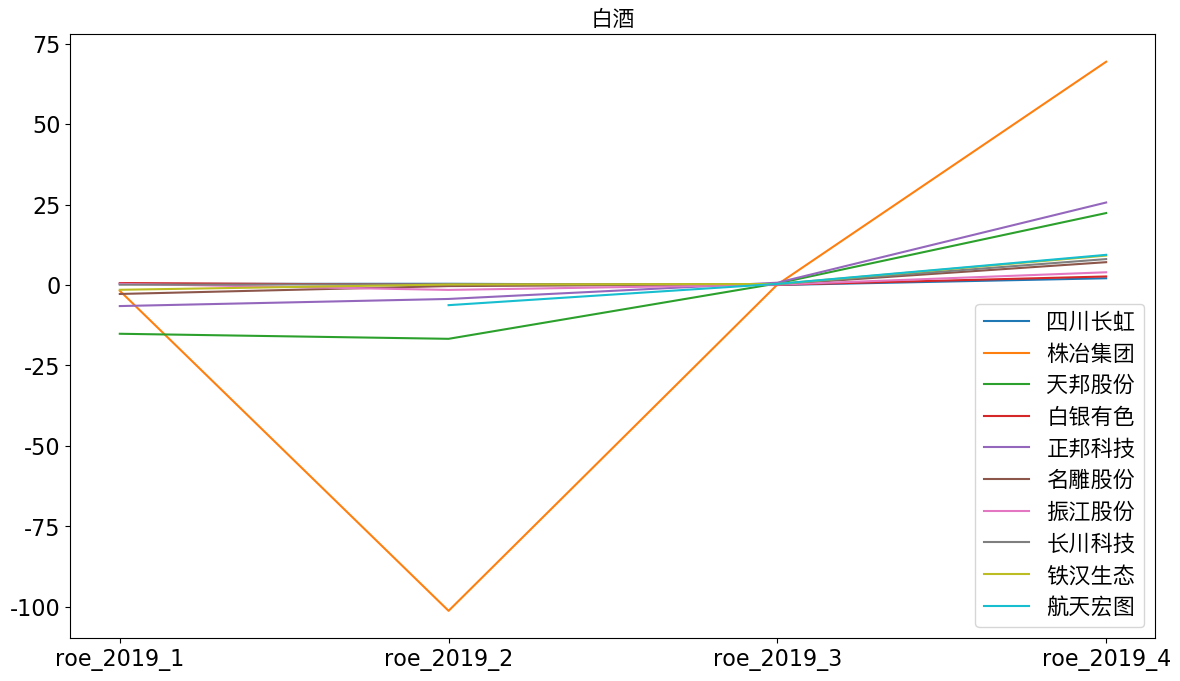

In [116]:
from matplotlib.font_manager import FontProperties
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
large = 22;
med = 16;
small = 12;
font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc', size=med)
params = {
    'figure.figsize': (14, 8),  # 图像的画布大小

    'figure.titlesize': large,  # 整个画布的标题字体大小
    'axes.titlesize': large,  # 子图上的标题字体大小
    'legend.fontsize': med,  # 图例的字体大小
    'axes.labelsize': med,  # 标签的字体大小
    'xtick.labelsize': med,  # x轴上的标尺的字体大小
    'ytick.labelsize': med,  # y轴上的标尺的字体大小

    # 'font.family': ['sans-serif'],
    'font.sans-serif': ['Microsoft YaHei'],  # 字体
    'axes.unicode_minus': False,  # 显示负号

    'figure.facecolor': 'white',  # 前景色
    'figure.edgecolor': 'white',  # 边框色
    'figure.dpi': 100  # 分辨率
}
plt.rcParams.update(params)
b=a.head(10)
for i in range(10):
    plt.plot(b.iloc[i,2:],label=b.iloc[i,0])
plt.legend(prop=font)
plt.title(u'白酒',fontproperties=font)

ImportError: No module named new_stock.indicators

In [68]:
import charts

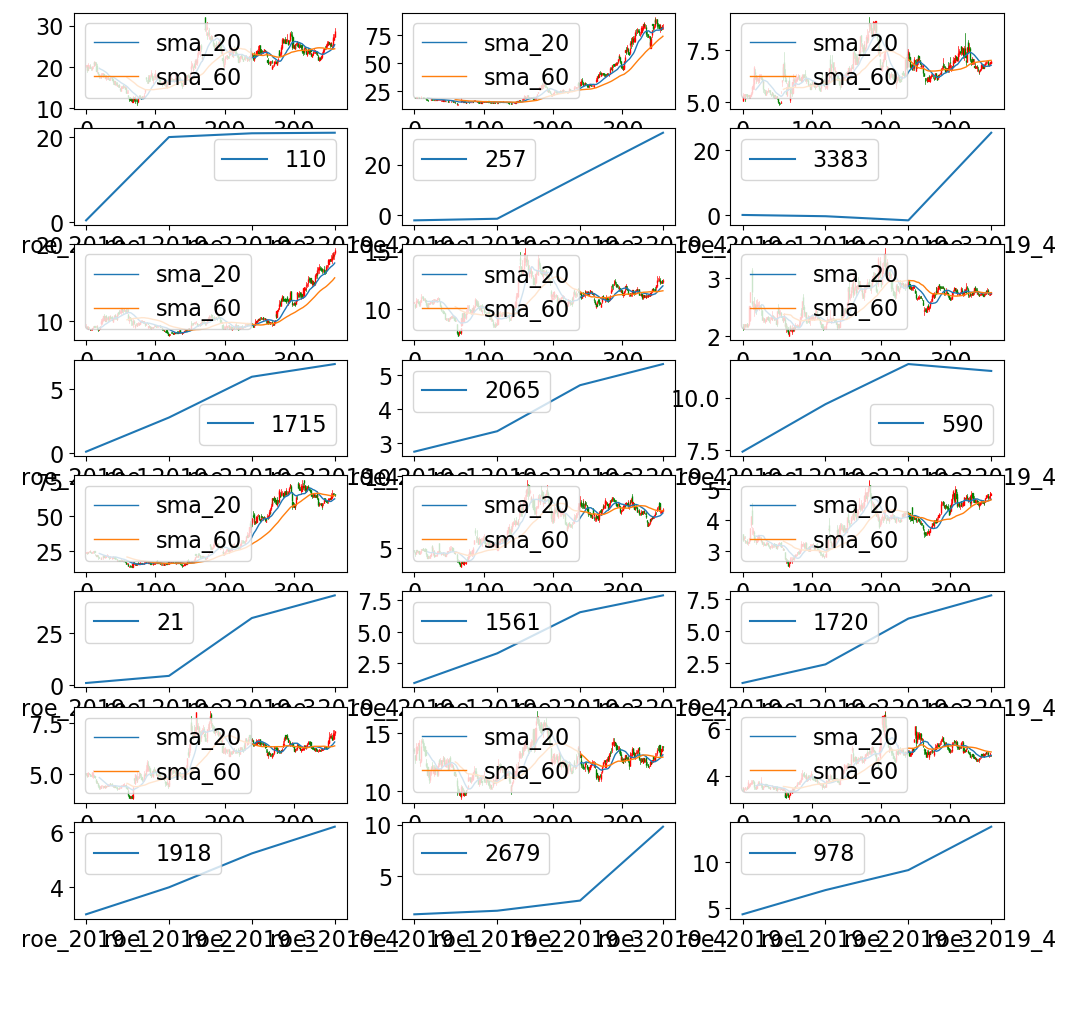

In [161]:
def roe_mul(roe_data, grid=(3, 3)):
    font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc', size=med)
    flg = plt.figure(figsize=(12, 12))
    grid = (np.ceil(len(ts_codes)/3.0)*2,3)
    print grid
    for index, ts_code in enumerate(roe_data.ts_code):
        row = index/3
        ax = flg.add_subplot(grid[0], grid[1], grid[1]*row+index+1)
        stock = get_daily(ts_code)  
        stock.rename(columns={'trade_date': 'date'}, inplace=True)
        stock = stock.tail(360).reset_index()
        charts.drawK(ax, stock)         
        charts.drawSMA(ax, stock,periods=[20,60])
        #charts.drawAll(ts_code, daily, types=[['K', 'SMA'], ['WR'], ['MACD']]) 
#         ax.set_title(s_unicode,fontproperties=font)         
#         ax = plt.twinx()
        ax.legend()
        ax = flg.add_subplot(grid[0], grid[1], grid[1]*(row+1)+index+1)
        ax.plot(roe_data.iloc[index,2:])
        ax.set_ylabel(roe_data.name.iloc[index],fontproperties=font)
        ax.legend()
    plt.show()
roe_mul(a.head(12))

KeyError: 0

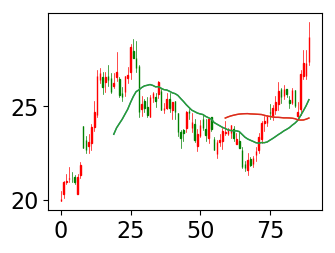

In [127]:
#k_mul(['600083.SH','002234.SZ','600768.SH','000526.SZ'])



In [79]:
daily = get_daily('600083.SH')
daily.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,adj_factor
0,600083.SH,20010928,5.00,5.00,5.00,5.00,5.48,-0.48,-8.7591,18175.00,9087.500,1.0
1,600083.SH,20011012,4.95,4.95,4.95,4.95,5.00,-0.05,-1.0000,14738.00,7295.310,1.0
2,600083.SH,20011019,5.00,5.00,5.00,5.00,4.95,0.05,1.0101,12829.03,6414.515,1.0
3,600083.SH,20011026,5.25,5.25,5.25,5.25,5.00,0.25,5.0000,19944.20,10470.705,1.0
4,600083.SH,20011102,5.51,5.51,5.51,5.51,5.25,0.26,4.9524,11901.00,6557.451,1.0


In [109]:
ts_codes = a.ts_code.head(10)
grid = (np.ceil(len(ts_codes)/3.0),3)
grid

(4.0, 3)

In [173]:
roe_data = pd.read_csv(base_path + 'roe.csv')
roe_data['roe_2019_pct'] = (roe_data['roe_2019_4'] - roe_data['roe_2018']) / roe_data['roe_2018']
roe_data['roe_2019_4_diff'] = roe_data['roe_2019_4'] - roe_data['roe_2019_3']
# roe_data = roe_data.loc[roe_data.roe_2019_3 < 0]
roe_data = roe_data.sort_values(by='roe_2019_4_diff', ascending=False)
roe_data.head(24)

,ts_code,name,ths_industry,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4,roe_2020,roe_2021,industry,roe_2019_pct,roe_2019_4_diff
3266,600961.SH,株冶集团,有色金属-有色冶炼加工-铅锌,-139.57,14.55,30.36,-11.58,-1.79,-101.26,0.15,69.40,60.10,29.90,铅锌,-6.993092,69.25
3622,002713.SZ,东易日盛,建筑材料-建筑装饰-装饰园林,10.52,17.46,21.05,21.48,-6.91,-5.32,-12.97,20.30,21.13,22.44,装修装饰,-0.054935,33.27
57,002458.SZ,益生股份,农林牧渔-养殖业-畜禽养殖,-78.41,49.32,-23.13,25.82,21.37,44.79,24.57,56.25,33.90,19.57,农业综合,1.178544,31.68
3383,600746.SH,江苏索普,化工-化学制品-其他化学制品,-4.75,5.09,15.96,0.74,0.15,-0.24,-1.51,25.41,23.75,23.29,化工原料,33.337838,26.92
3129,002157.SZ,正邦科技,农林牧渔-农产品加工-饲料Ⅲ,13.70,28.58,8.63,3.03,-6.54,-4.33,0.72,25.65,58.84,43.26,饲料,7.465347,24.93
2022,603363.SH,傲农生物,农林牧渔-农产品加工-饲料Ⅲ,13.24,21.39,18.52,4.97,2.12,2.60,4.87,27.17,52.35,32.62,饲料,4.466801,22.30
3178,002124.SZ,天邦股份,农林牧渔-农产品加工-饲料Ⅲ,17.19,30.04,10.15,-21.14,-15.15,-16.72,0.50,22.37,63.45,38.71,饲料,-2.058184,21.87
1052,300752.SZ,隆利科技,电子-光学光电子-LED,23.03,55.18,41.76,40.76,3.57,7.59,8.81,30.30,27.20,24.90,元器件,-0.256624,21.49
517,601155.SH,新城控股,房地产-房地产开发-房地产开发Ⅲ,22.53,22.44,34.18,41.91,0.68,8.34,12.22,33.35,33.97,32.99,区域地产,-0.204247,21.13
478,300586.SZ,美联新材,化工-化工合成材料-其他塑料制品,14.48,14.40,9.63,10.75,5.97,9.36,12.67,33.49,32.99,29.83,化工原料,2.115349,20.82


In [170]:
roe_data.loc[roe_data.roe_2019_3>10]

,ts_code,name,ths_industry,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4,roe_2020,roe_2021,industry,roe_2019_pct
815,002531.SZ,天顺风能,机械设备-电气设备-电源设备,14.20,14.67,9.95,9.28,1.65,6.20,10.01,13.25,15.18,15.82,电气设备,0.427802
818,603800.SH,道森股份,机械设备-专用设备-冶金矿采化工设备,5.79,-6.34,3.18,9.19,1.74,6.46,10.01,NaN,NaN,NaN,专用机械,NaN
817,300731.SZ,科创新源,化工-化工合成材料-其他橡胶制品,29.98,31.46,28.53,9.03,2.47,5.61,10.01,10.51,13.05,21.11,橡胶,0.163898
816,300371.SZ,汇中股份,机械设备-仪器仪表-仪器仪表,13.84,10.03,11.39,13.66,1.14,4.32,10.01,13.67,13.76,14.00,电器仪表,0.000732
814,300741.SZ,华宝股份,食品饮料-食品加工制造-食品综合,19.83,22.61,22.29,14.57,3.21,7.45,10.02,14.02,13.62,13.68,食品,-0.037749
813,300118.SZ,东方日升,机械设备-电气设备-电源设备,11.30,20.29,16.04,3.10,4.00,6.33,10.02,11.52,11.98,13.02,半导体,2.716129
812,300234.SZ,开尔新材,建筑材料-建筑材料-其他建材,11.87,3.19,-0.61,-7.49,4.66,7.80,10.03,11.69,16.74,17.88,陶瓷,-2.560748
811,002203.SZ,海亮股份,有色金属-有色冶炼加工-铜,12.52,13.61,13.57,14.87,3.76,7.88,10.03,12.08,12.75,13.53,铜,-0.187626
810,603997.SH,继峰股份,交运设备-汽车零部件-汽车零部件Ⅲ,15.11,17.51,18.11,16.91,3.12,6.05,10.06,13.87,16.14,17.77,汽车配件,-0.179775
809,600693.SH,东百集团,商业贸易-零售-百货零售,2.96,5.42,12.14,11.70,1.34,1.67,10.07,NaN,NaN,NaN,百货,NaN


In [176]:
#查看某股ROE
roe_data.loc[roe_data.industry=='白酒']

,ts_code,name,ths_industry,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4,roe_2020,roe_2021,industry,roe_2019_pct,roe_2019_4_diff
158,000858.SZ,五粮液,食品饮料-饮料制造-白酒,14.93,15.01,19.38,22.80,9.70,13.70,18.57,34.00,41.41,36.78,白酒,0.491228,15.43
52,600519.SH,贵州茅台,食品饮料-饮料制造-白酒,26.23,24.44,32.95,34.46,9.47,16.21,24.92,32.48,31.37,30.14,白酒,-0.057458,7.56
1363,603919.SH,金徽酒,食品饮料-饮料制造-白酒,24.09,16.28,14.58,13.57,5.32,6.44,7.42,14.23,14.61,15.34,白酒,0.048637,6.81
393,603198.SH,迎驾贡酒,食品饮料-饮料制造-白酒,16.42,17.84,16.90,18.42,7.83,9.75,13.49,18.77,18.23,17.53,白酒,0.019001,5.28
124,603589.SH,口子窖,食品饮料-饮料制造-白酒,20.55,19.81,24.00,27.42,8.46,13.84,20.20,25.10,24.29,23.39,白酒,-0.084610,4.90
602,600197.SH,伊力特,食品饮料-饮料制造-白酒,16.20,14.90,17.44,18.32,5.70,7.79,11.49,16.10,16.80,17.50,白酒,-0.121179,4.61
1071,600559.SH,老白干酒,食品饮料-饮料制造-白酒,10.83,7.05,9.84,14.91,4.05,6.40,8.75,13.15,14.25,15.47,白酒,-0.118042,4.40
115,000568.SZ,泸州老窖,食品饮料-饮料制造-白酒,14.74,17.79,20.30,21.81,8.53,14.98,20.66,24.84,26.54,27.60,白酒,0.138927,4.18
1144,000860.SZ,顺鑫农业,食品饮料-饮料制造-白酒,7.20,7.09,6.32,10.04,5.41,8.08,8.31,12.42,14.27,15.52,白酒,0.237052,4.11
1173,000799.SZ,酒鬼酒,食品饮料-饮料制造-白酒,5.17,6.00,9.02,10.70,3.28,6.93,8.18,12.02,14.53,16.39,白酒,0.123364,3.84
